In [1]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [2]:
Chainlink = pd.read_csv('../data/Chainlink_Data.csv')
Chainlink_labels = pd.read_csv('../data/Chainlink_Labels.csv')

Kmeans Silhouette Score: 0.2833794761465094 Number of Clusters: 2
DBSCAN Silhouette Score: 0.1536358301003274 Number of Clusters: 2
Agglomerative Silhouette Score: 0.27194296371045484 Number of Clusters: 2


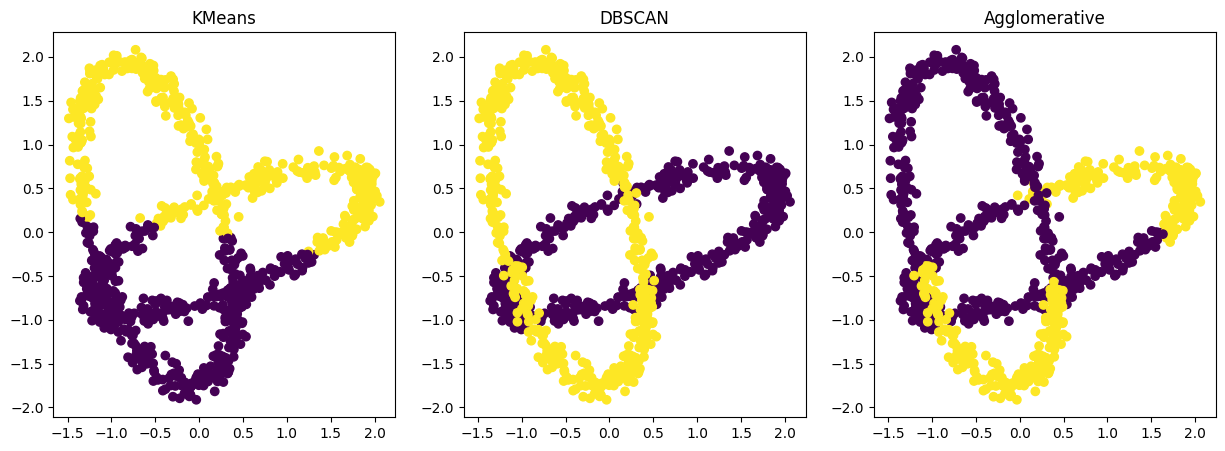

In [3]:
scaler = StandardScaler()
Chainlink_scaled = scaler.fit_transform(Chainlink)
Chainlink = pd.DataFrame(Chainlink_scaled, columns=Chainlink.columns)
models = []
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(Chainlink)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(Chainlink, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Chainlink)
models.append({'model': dbscan, 'name': 'DBSCAN', 'labels': dbscan_labels})
if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN Silhouette Score:', silhouette_score(Chainlink, dbscan_labels), "Number of Clusters:", len(np.unique(dbscan_labels)))
else:
    print('DBSCAN Silhouette Score: N/A', "Number of Clusters:", len(np.unique(dbscan_labels)))

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(Chainlink)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(Chainlink, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))

# visualize the clusters
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Chainlink)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()

## Lime

In [7]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Chainlink, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Chainlink, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(Chainlink)))
explainer = LimeTabularExplainer(Chainlink.values, mode='classification', feature_names=Chainlink.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Chainlink.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#DBSCAN
if len(np.unique(dbscan_labels)) > 1:
    y = (dbscan_labels == clustterToExplain).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(Chainlink, y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(Chainlink, y)
    print('DBSCAN Accuracy:', accuracy_score(y, clf.predict(Chainlink)))
    explainer = LimeTabularExplainer(Chainlink.values, mode='classification', feature_names=Chainlink.columns, class_names=['0', '1'], discretize_continuous=True)
    exp = explainer.explain_instance(Chainlink.values[i], clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Chainlink, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Chainlink, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(Chainlink)))
explainer = LimeTabularExplainer(Chainlink.values, mode='classification', feature_names=Chainlink.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Chainlink.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.999


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DBSCAN Accuracy: 0.656


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 0.987


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

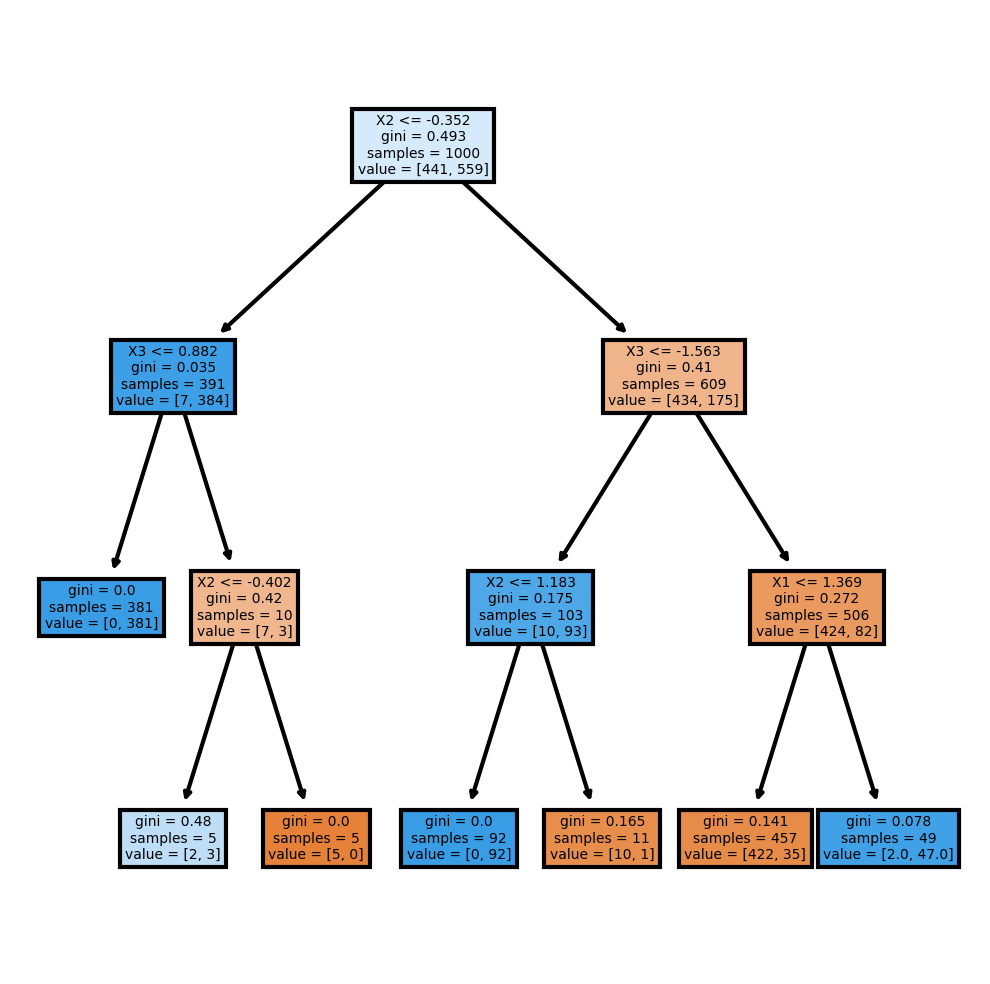

Decision Tree Accuracy: 0.96


In [8]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Chainlink, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Chainlink.columns)
plt.show()
y_pred = dt.predict(Chainlink)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


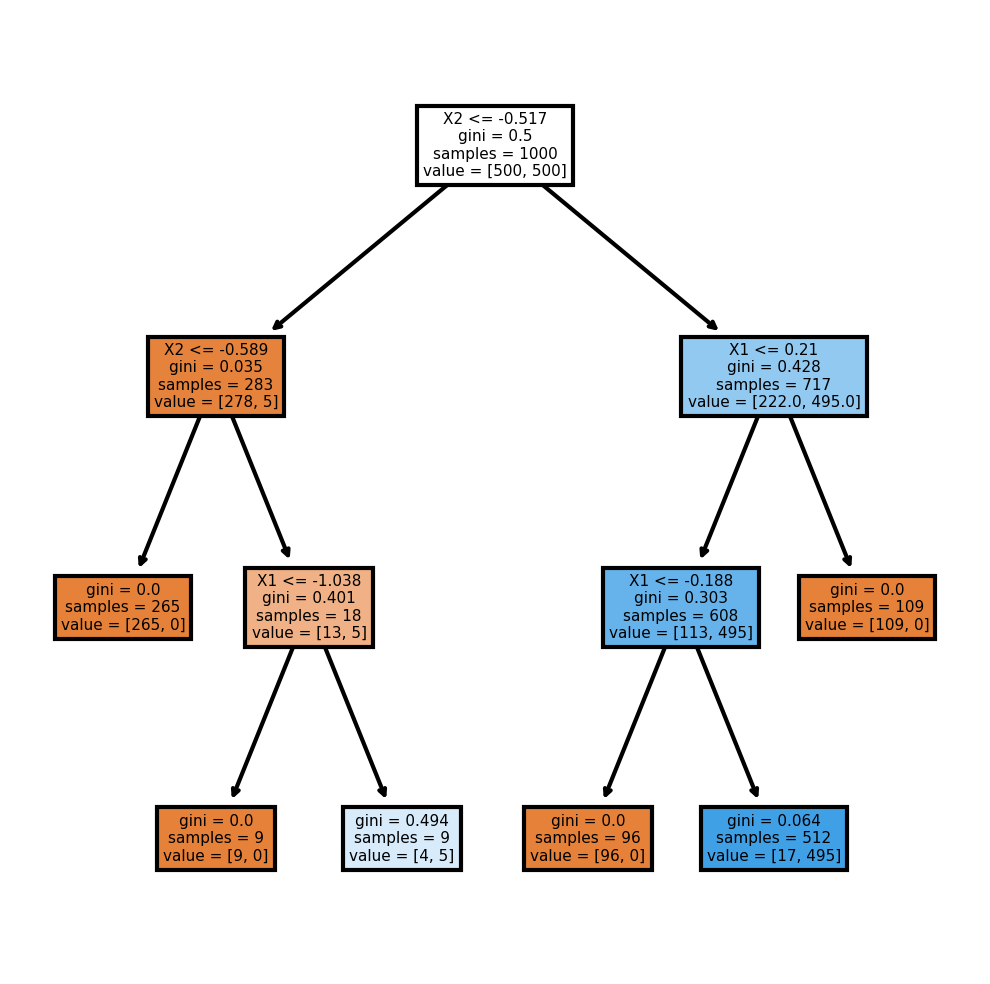

Decision Tree Accuracy: 0.979


In [9]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Chainlink, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Chainlink.columns)
plt.show()
y_pred = dt.predict(Chainlink)
print('Decision Tree Accuracy:', accuracy_score(dbscan_labels, y_pred))

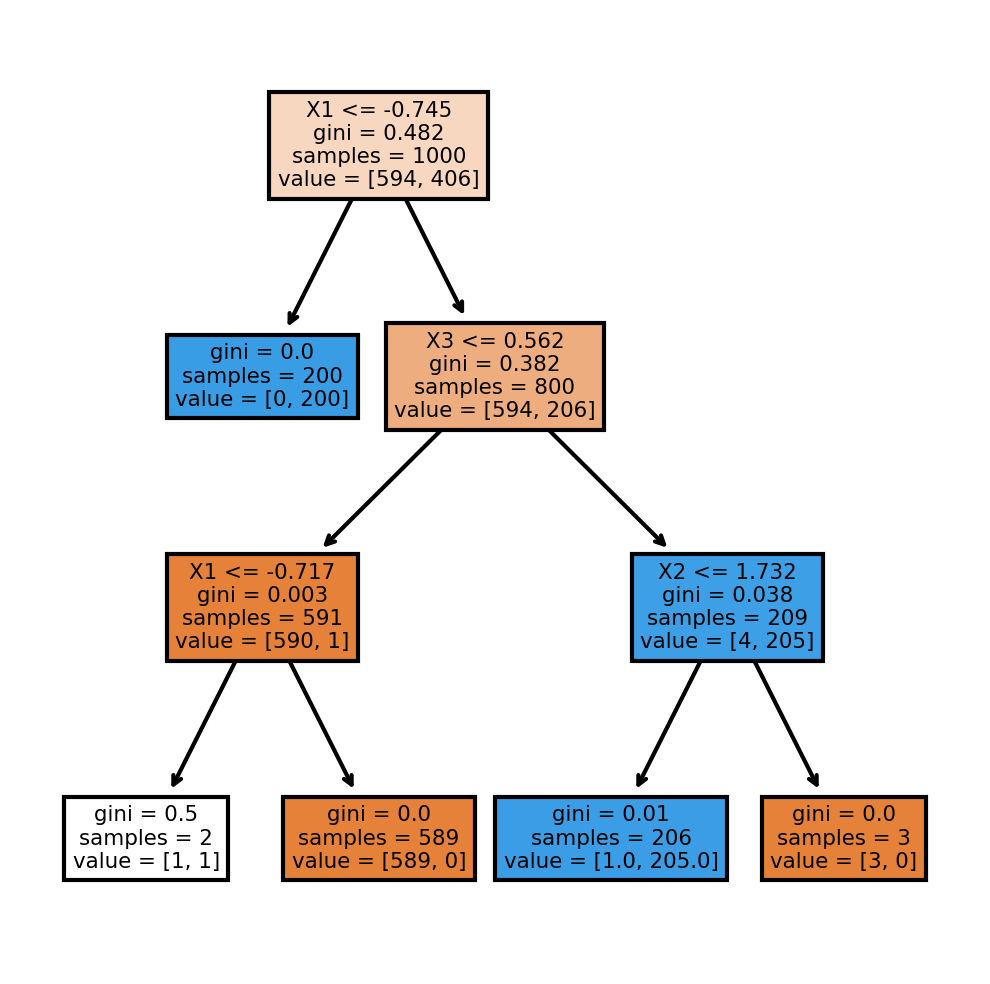

Decision Tree Accuracy: 0.998


In [10]:
# interpretamos con decision tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(Chainlink, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Chainlink.columns)
plt.show()
y_pred = dt.predict(Chainlink)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [6]:
pos =1
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
dbscan_labels_pos = (dbscan_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([Chainlink, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Chainlink)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# DBSCAN
ripper = lw.RIPPER()
df = pd.concat([Chainlink, pd.DataFrame(dbscan_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Chainlink)
print('RIPPER Accuracy DBSCAN:', accuracy_score(dbscan_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([Chainlink, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Chainlink)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[X3=<-1.57] V [X1=-1.57--0.73] V [X3=-1.57--0.73] V [X1=<-1.57] V [X3=-0.73--0.084^X2=>1.52] V [X1=-0.73--0.084^X2=0.52-0.84^X3=-0.018-0.021] V [X1=-0.73--0.084^X2=<-1.49] V [X3=-0.73--0.084^X2=-0.49--0.34] V [X1=-0.73--0.084^X2=0.52-0.84^X3=-0.084--0.018] V [X1=-0.73--0.084^X2=0.52-0.84^X3=0.063-0.13] V [X3=-0.73--0.084^X1=-0.73--0.084] V [X3=-0.73--0.084^X2=-1.03--0.49^X1=0.021-0.063] V [X1=-0.73--0.084^X3=0.021-0.063] V [X2=>1.52^X3=-0.084--0.018] V [X3=-0.73--0.084^X1=0.063-0.13]]
RIPPER Accuracy KMeans: 0.988
[[X1=-0.018-0.021] V [X1=0.063-0.13^X3=>1.59] V [X1=0.021-0.063] V [X1=-0.084--0.018^X3=0.68-1.59] V [X1=-0.084--0.018^X3=-1.57--0.73] V [X1=0.063-0.13^X3=-1.57--0.73] V [X3=<-1.57] V [X3=0.68-1.59] V [X3=>1.59] V [X3=-1.57--0.73] V [X2=>1.52] V [X2=-0.49--0.34^X1=-0.084--0.018] V [X2=-1.03--0.49^X3=0.13-0.68^X1=-0.084--0.018] V [X1=0.063-0.13^X2=-1.03--0.49] V [X1=0.063-0.13^X2=-0.49--0.34] V [X2=-1.03--0.49^X1=-0.73--0.084] V [X3=0.13-0.68^X1=-0.73--0.084] V [X1=0.13-0.68^

## DSClustering

Optimization started
Processing epoch	342	0.0016	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 42.31s, epochs: 362

Least training loss reached: 0.001


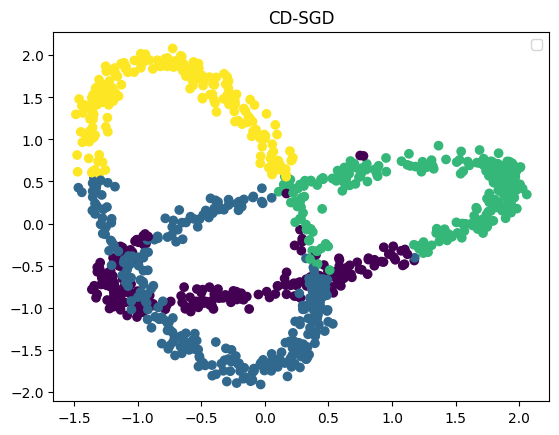

In [12]:
cdsgd = DSClustering(data=Chainlink)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Chainlink)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [13]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.642] R16: 0.010 < X3 < 0.715
			0: 0.441	1: 0.000	2: 0.493	3: 0.000	Unc: 0.065

	[0.613] R15: -0.696 < X3 < 0.010
			0: 0.377	1: 0.024	2: 0.596	3: 0.000	Unc: 0.003

	[0.591] R11: -0.598 < X2 < 0.048
			0: 0.557	1: 0.021	2: 0.048	3: 0.000	Unc: 0.374

	[0.514] R12: 0.048 < X2 < 0.695
			0: 0.358	1: 0.293	2: 0.086	3: 0.000	Unc: 0.263

	[0.461] R9: X1 > 0.685
			0: 0.461	1: 0.000	2: 0.000	3: 0.000	Unc: 0.539

	[0.328] R10: X2 < -0.598
			0: 0.169	1: 0.000	2: 0.468	3: 0.000	Unc: 0.363

	[0.247] R30: Positive X1 - 0.016, X3 - 0.010
			0: 0.134	1: 0.273	2: 0.051	3: 0.000	Unc: 0.543

	[0.210] R29: Negative X1 - 0.016, X2 - 0.048
			0: 0.144	1: 0.077	2: 0.052	3: 0.035	Unc: 0.693

Most important rules for Cluster 1

	[0.698] R8: 0.016 < X1 < 0.685
			0: 0.000	1: 0.588	2: 0.000	3: 0.241	Unc: 0.171

	[0.648] R13: X2 > 0.695
			0: 0.000	1: 0.480	2: 0.000	3: 0.393	Unc: 0.127

	[0.537] R7: -0.653 < X1 < 0.016
			0: 0.000	1: 0.289	2: 0.309	3: 0.402	Unc: 0.000


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\cdsgd\ClusteringSelector.py:248: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  row_modes[0][x] = self.get_best_labels()[x]


Optimization started
Processing epoch	342	0.0016	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 40.68s, epochs: 351

Least training loss reached: 0.002


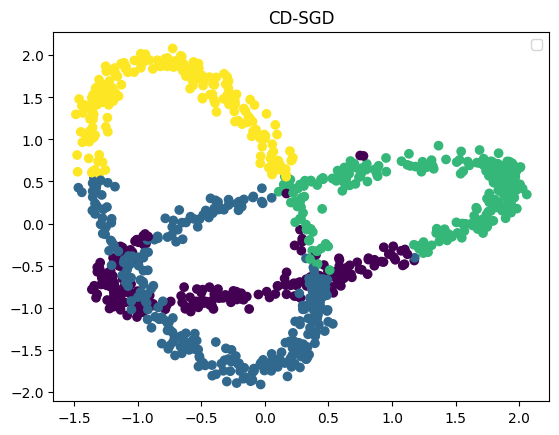

In [14]:
cdsgd = DSClustering(data=Chainlink, most_voted=True)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD más votado', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Chainlink)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [15]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.636] R16: 0.010 < X3 < 0.715
			0: 0.438	1: 0.000	2: 0.486	3: 0.000	Unc: 0.077

	[0.626] R15: -0.696 < X3 < 0.010
			0: 0.393	1: 0.025	2: 0.579	3: 0.000	Unc: 0.003

	[0.606] R11: -0.598 < X2 < 0.048
			0: 0.532	1: 0.021	2: 0.139	3: 0.000	Unc: 0.309

	[0.475] R9: X1 > 0.685
			0: 0.475	1: 0.000	2: 0.000	3: 0.000	Unc: 0.525

	[0.456] R12: 0.048 < X2 < 0.695
			0: 0.293	1: 0.292	2: 0.091	3: 0.036	Unc: 0.289

	[0.341] R10: X2 < -0.598
			0: 0.174	1: 0.000	2: 0.497	3: 0.000	Unc: 0.329

	[0.217] R29: Negative X1 - 0.016, X2 - 0.048
			0: 0.161	1: 0.100	2: 0.031	3: 0.000	Unc: 0.708

	[0.208] R30: Positive X1 - 0.016, X3 - 0.010
			0: 0.112	1: 0.252	2: 0.019	3: 0.000	Unc: 0.616

Most important rules for Cluster 1

	[0.749] R8: 0.016 < X1 < 0.685
			0: 0.000	1: 0.639	2: 0.000	3: 0.238	Unc: 0.123

	[0.606] R13: X2 > 0.695
			0: 0.000	1: 0.436	2: 0.000	3: 0.405	Unc: 0.159

	[0.577] R7: -0.653 < X1 < 0.016
			0: 0.000	1: 0.333	2: 0.265	3: 0.402	Unc: 0.000


Optimization started
Processing epoch	373	0.0035	

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Training time: 44.60s, epochs: 400

Least training loss reached: 0.003


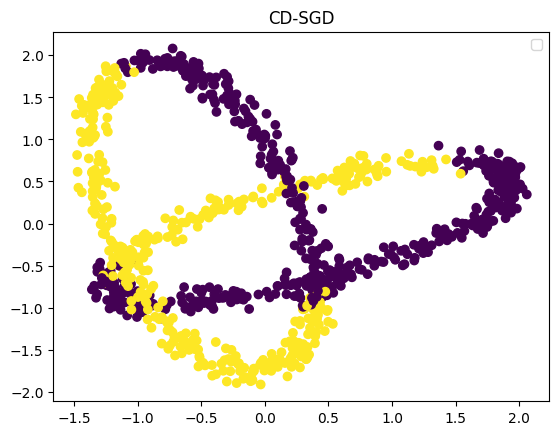

In [16]:
cdsgd = DSClustering(data=Chainlink,cluster=2)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 2 clusters', 'labels': cdsgd_labels})
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Chainlink)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [17]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.739] R8: X2 < -0.598
			0: 0.739	1: 0.000	Unc: 0.261

	[0.522] R9: -0.598 < X2 < 0.048
			0: 0.521	1: 0.002	Unc: 0.477

	[0.469] R12: X3 < -0.696
			0: 0.469	1: 0.000	Unc: 0.531

	[0.317] R4: X1 < -0.653
			0: 0.312	1: 0.010	Unc: 0.678

	[0.208] R14: 0.010 < X3 < 0.715
			0: 0.193	1: 0.032	Unc: 0.775

	[0.202] R13: -0.696 < X3 < 0.010
			0: 0.160	1: 0.094	Unc: 0.746

Most important rules for Cluster 1

	[0.719] R11: X2 > 0.695
			0: 0.000	1: 0.719	Unc: 0.281

	[0.574] R15: X3 > 0.715
			0: 0.000	1: 0.574	Unc: 0.426

	[0.511] R10: 0.048 < X2 < 0.695
			0: 0.000	1: 0.511	Unc: 0.489

	[0.239] R5: -0.653 < X1 < 0.016
			0: 0.000	1: 0.239	Unc: 0.761


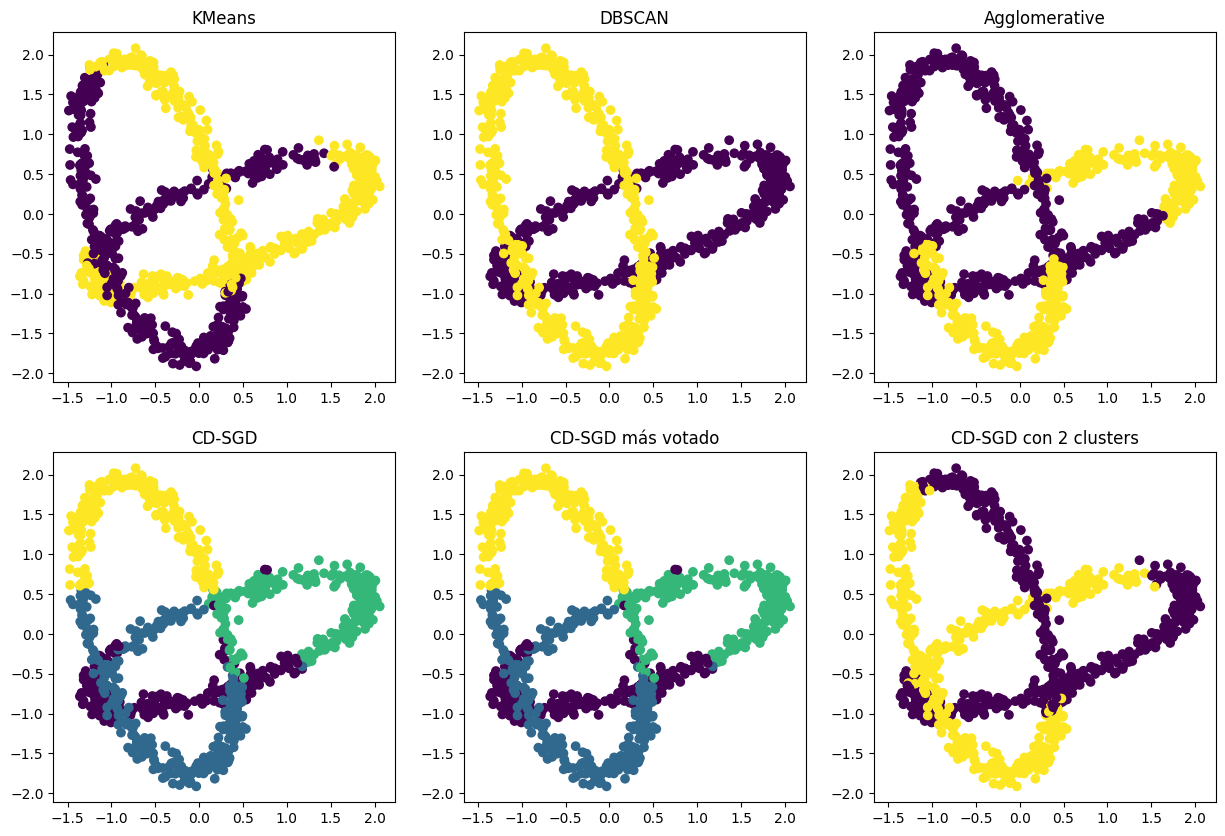

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Chainlink)
    ax[i//3, i%3].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i//3, i%3].title.set_text(model['name'])
plt.show()